#House Prices Prediction modelation

#Importing libraries, loading the dataset and first overview

In [0]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
test.shape

(1459, 80)

In [0]:
train.shape

(1460, 81)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
# Vyberte sloupce s datovým typem "float"
float_columns = train.select_dtypes(include=['float'])

# Vyberte sloupce s datovým typem "int"
int_columns = train.select_dtypes(include=['int'])

# Výpis sloupců s datovým typem "float"
print("Sloupce s datovým typem float:")
print(float_columns.columns)

# Výpis sloupců s datovým typem "int"
print("Sloupce s datovým typem int:")
print(int_columns.columns)


Sloupce s datovým typem float:
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Sloupce s datovým typem int:
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [0]:
# Vyberte více numerických sloupců
numerical_categories = train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [0]:
numerical_categories = numerical_categories.fillna("mean")

In [0]:
numerical_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtFinSF2     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  LowQualFinSF   1460 non-null   int64
 13  GrLivArea      1460 non-null   int64
 14  BsmtFullBath   1460 non-null   int64
 15  BsmtHalfBath   1460 non-null   int64
 16  FullBath       1460 non-null   int64
 17  HalfBath       1460 non-null   int64
 18  BedroomAbvGr   1460 non-null   int64
 19  Kitche

In [0]:
train = train.drop('Id', axis=1) #zde odstraňujeme z PŮVODNÍHO DF sloupec Id
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [0]:
train = train.drop(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], axis=1)
#z původního DF odstraňujeme původní numerické sloupečky s chybějícími hodnotami

#příprava pro model 1 (num. hodnoty, doplnění NaN s mean)

In [0]:
train_new = pd.concat([train, numerical_categories], axis = 1 )
#spojujeme do train zbývající object sloupečky a doplňujeme sloupečky s numerickými hodnotami, ale již doplněnými o průměrné hodnoty, tam kde hodnoty v původním DF chyběly

In [0]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [0]:
#zde si definujeme jen tu část z train_new, která obsahuje jen numerické hodnoty

df_num = train_new.select_dtypes(include = ['float64', 'int64']) #pro vícero typů nutno zadat do []
df_num.head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
#zde si definujeme jen tu část z train_new, která obsahuje jen Objecty/stringy

df_obj = train_new.select_dtypes(include = 'O') #pokud chci vidět jen jeden typ, hranaté závorky netřeba
df_obj.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [0]:
# Vyberte sloupce s datovým typem "object"
object_columns = train_new.select_dtypes(include=['O'])

# Výpis sloupců s datovým typem "object"
print("Sloupce s datovým typem object:")
print(object_columns.columns)


Sloupce s datovým typem object:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


#Encoding strings to numerical values

In [0]:
# předělat stringy do numeric categories a zapracovat do modelu
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of column names you want to encode
columns_to_encode = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
 'SaleType', 'SaleCondition']

# Loop through the columns and apply label encoding
for column in columns_to_encode:
    df_obj[column] = label_encoder.fit_transform(df_obj[column])


In [0]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   Street         1460 non-null   int64
 2   Alley          1460 non-null   int64
 3   LotShape       1460 non-null   int64
 4   LandContour    1460 non-null   int64
 5   Utilities      1460 non-null   int64
 6   LotConfig      1460 non-null   int64
 7   LandSlope      1460 non-null   int64
 8   Neighborhood   1460 non-null   int64
 9   Condition1     1460 non-null   int64
 10  Condition2     1460 non-null   int64
 11  BldgType       1460 non-null   int64
 12  HouseStyle     1460 non-null   int64
 13  RoofStyle      1460 non-null   int64
 14  RoofMatl       1460 non-null   int64
 15  Exterior1st    1460 non-null   int64
 16  Exterior2nd    1460 non-null   int64
 17  MasVnrType     1460 non-null   int64
 18  ExterQual      1460 non-null   int64
 19  ExterC

In [0]:
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4


In [0]:
df_obj.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.028767,0.995890,1.903425,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,1.410274,1.075342,9.624658,10.339726,1.773288,2.539726,3.733562,1.396575,2.305479,2.842466,2.310274,2.815068,4.741781,1.036301,1.538356,0.934932,3.682877,2.339726,5.749315,3.804795,2.485616,1.284247,3.927397,3.960959,1.856164,2.991096,3.504795,3.922603,7.513014,3.770548
std,0.632017,0.063996,0.394776,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,0.834998,0.599127,3.197659,3.540570,0.635891,0.693995,0.731807,0.722394,0.899225,0.676527,1.165663,1.874410,0.946713,0.295124,1.739524,0.246731,1.051834,0.830161,0.979659,1.398954,1.933206,0.892831,0.647822,0.566832,0.496592,0.140703,1.082912,0.404103,1.552100,1.100854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,8.000000,8.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000,1.000000,0.000000,1.000000,4.000000,2.000000,6.000000,2.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
50%,3.000000,1.000000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,12.000000,13.000000,2.000000,3.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,1.000000,0.000000,1.000000,4.000000,3.000000,6.000000,4.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
75%,3.000000,1.000000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,17.000000,2.000000,2.000000,0.000000,5.000000,1.000000,1.000000,12.000000,13.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,5.000000,5.000000,1.000000,4.000000,1.000000,4.000000,3.000000,6.000000,5.000000,5.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
max,4.000000,1.000000,2.000000,3.000000,3.000000,1.000000,4.000000,2.000000,24.000000,8.000000,7.000000,4.000000,7.000000,5.000000,7.000000,14.000000,15.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,6.000000,6.000000,5.000000,4.000000,1.000000,5.000000,3.000000,6.000000,5.000000,6.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,5.000000


#korelační matice

In [0]:
corr = train_new.corr(method="pearson")
corr.style.background_gradient("coolwarm")

#návrh: přeskupit sloupce tak, aby první byl SalePrice a tím jsme lépe viděly, které hodnoty ji nejvíce ovlivňují

/root/.ipykernel/1294/command-2739365405056839-41626587:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.193458,0.070250,-0.386347,0.426095,0.251646,-0.059213,0.123349,0.088866,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.085072,-0.024947,0.547766,-0.324297,0.825667,0.642277,0.153484,-0.088011,0.190708,0.322445,0.233449,0.070832,-0.036363,0.231197,0.124553,-0.077464,0.484557,0.196785,-0.064518,-0.124411,0.148112,0.046822,0.588920,0.564567,0.224577,0.228425,-0.297003,0.023544,-0.075418,-0.014501,-0.032417,0.005337,-0.001014,0.486362
MSSubClass,-0.386347,0.022936,0.085072,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,0.426095,0.104160,-0.024947,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.411876,0.547766,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.128101,-0.324297,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.315707,0.825667,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.179618,0.642277,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,0.233633,0.264736,0.153484,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/root/.ipykernel/1294/command-2739365405056815-518200163:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




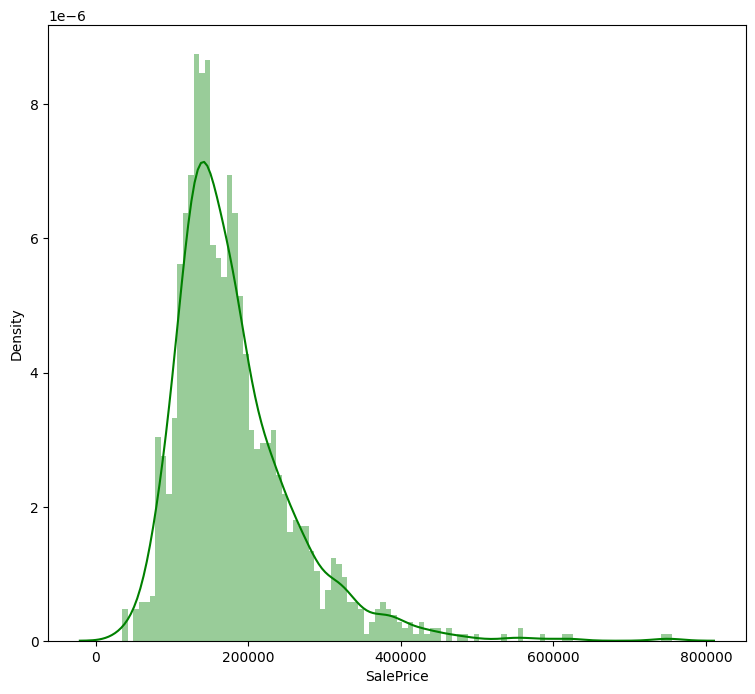

In [0]:
print(train_new['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_new['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#Numerical data distribution

In [0]:
list(set(train_new.dtypes.tolist())) #vypsané typy: označení dle Pandas

[dtype('O'), dtype('int64'), dtype('float64')]

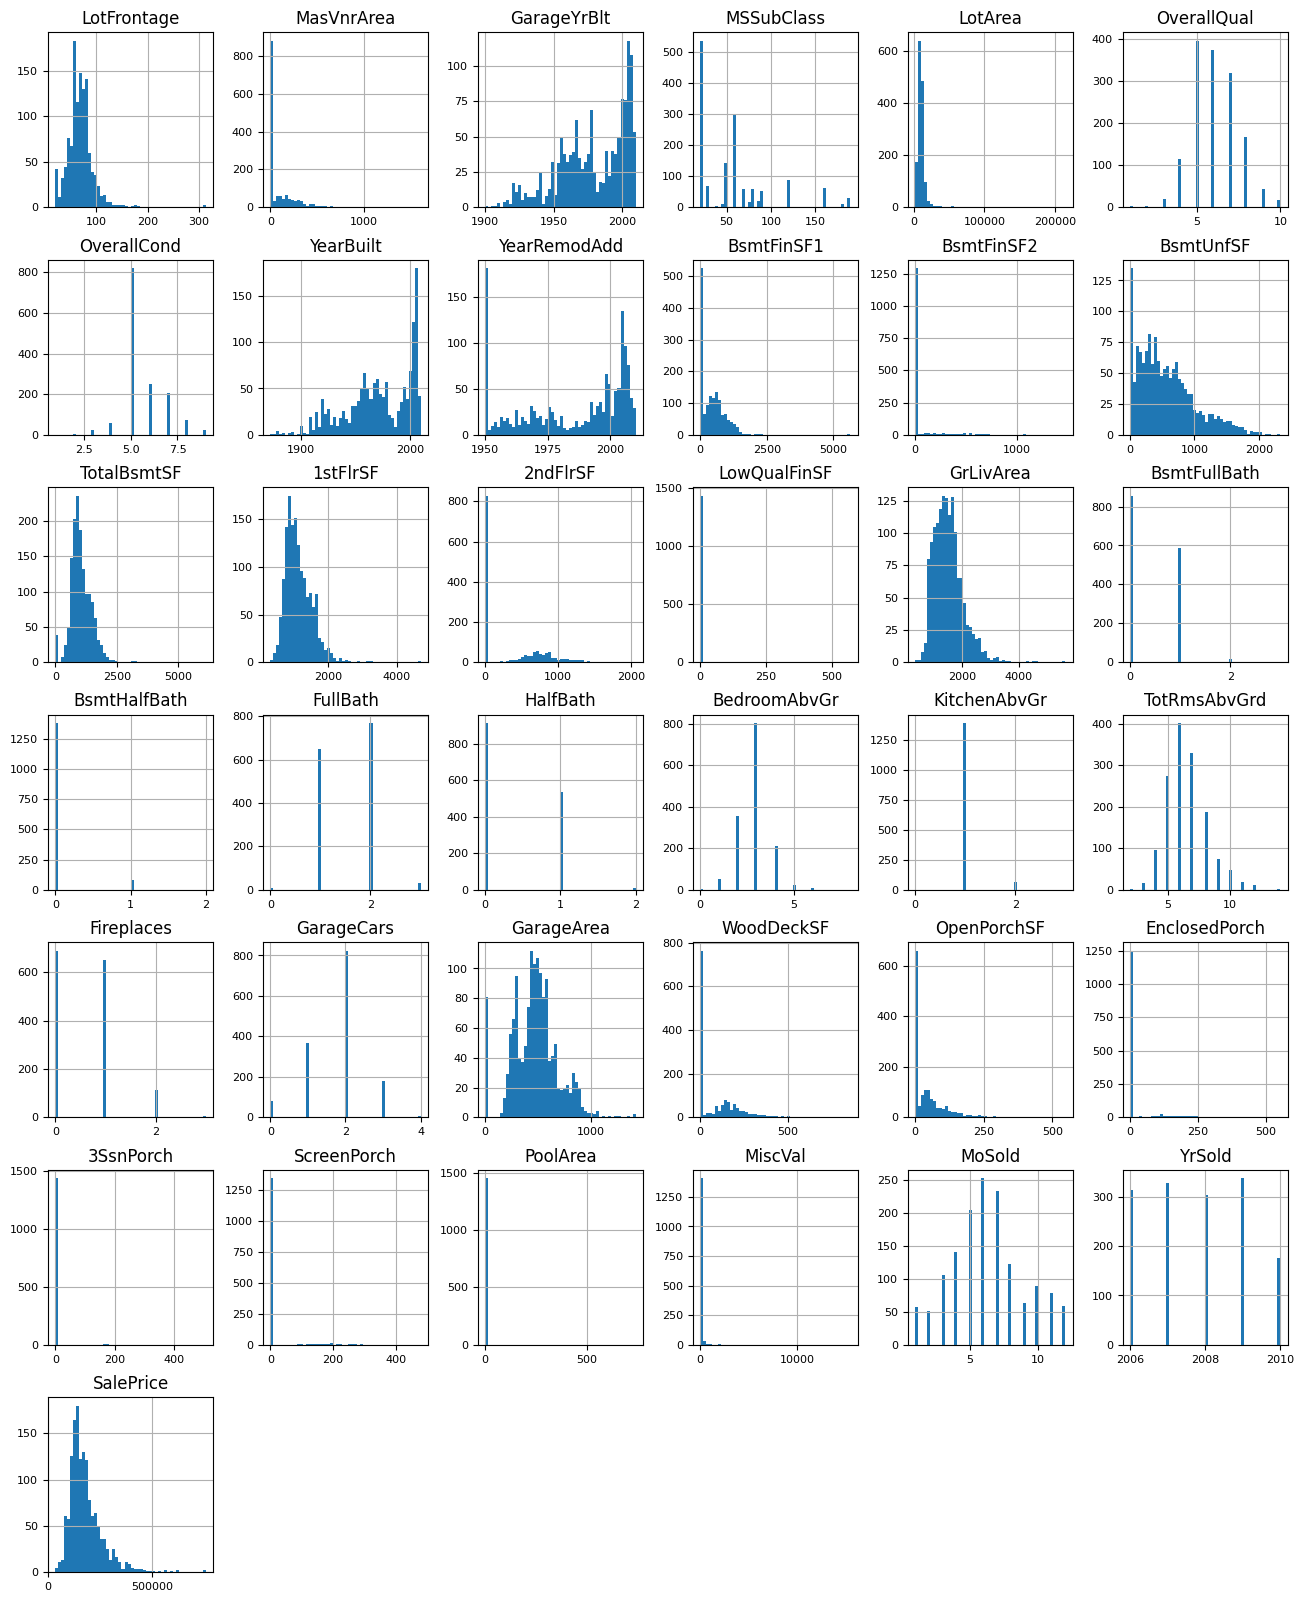

In [0]:
#zde vypisujeme grafy pro jednotlivé numerické hodnoty (s pomocí datasetu "df_num", který vznikl z "train_new")
#je fajn okomentovat, případně vybrat jen ty zajímavé + přidat popisky os

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [0]:
df_num.head()


,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
df_num.shape

(1460, 37)

#Select a Model

In [0]:
from sklearn.tree import DecisionTreeRegressor #doplnit si
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#stačí až po vygenerování těchto modelů vrátit se k feature engineeringu

#MODEL 1 Random Forest (za použití hyperparameter tunning)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 811662374.1047322
R-squared (R2): 0.8817556301652998


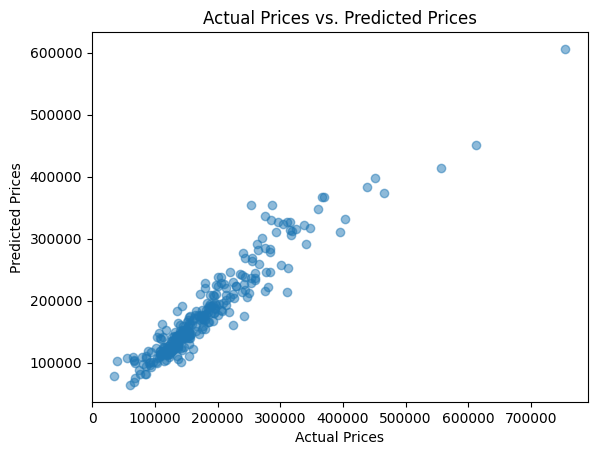

In [0]:
#Horsi MSE nez u modelu bez hyperparametr tunning

import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and the target (y)
X = numerical_categories.drop(columns=['SalePrice'])
y = numerical_categories['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model (Random Forest Regressor in this case)
model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Create a model with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)

# Train the model with the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [0]:
'''
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (MSE): 856 753 362.6167003 (LOWER VALUES ARE BETTER)
R-squared (R2): 0.8817556301652998
'''

#pro porování co vyšlo při pouze numerických sloupcích (MODEL2)
#Mean Squared Error (MSE): 811 662 374.1047322 (přesnost modelu)
#R-squared (R2): 0.8941815051693367 (variabilita modelu)

#pro porování co vyšlo při pouze objectových sloupcích (MODEL3)
#Mean Squared Error (MSE): 2 087 765 579.4503145
#R-squared (R2): 0.727812674056278

#pro porování co vyšlo při kompletně doplněných datech řádným preprocessingem (MODEL4)
#Mean Squared Error (MSE): 795 038 255.5241084
#R-squared (R2): 0.8963488339284509

#pro porování co vyšlo při kompletně doplněných datech + suma (MODEL5)
#Mean Squared Error (MSE): 906 972 888.7954274
#R-squared (R2): 0.8817556301652998

"\nFitting 5 folds for each of 108 candidates, totalling 540 fits\nBest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}\nMean Squared Error (MSE): 856 753 362.6167003 (LOWER VALUES ARE BETTER)\nR-squared (R2): 0.8817556301652998\n"

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 811662374.1047322
R-squared (R2): 0.8817556301652998


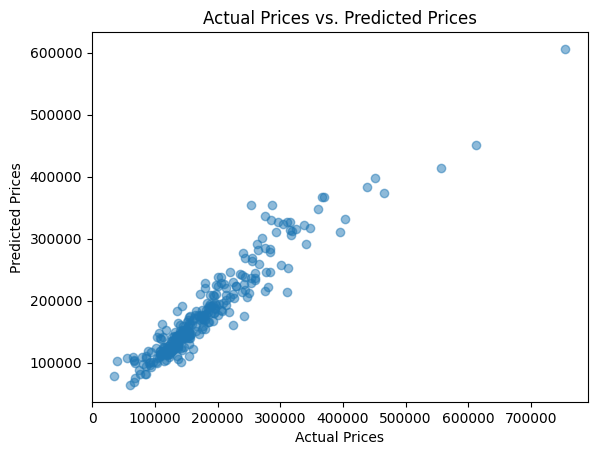

In [0]:
# hyperparametr tunning v2 - vyšší hodnoty n_estimators, vybere stejné hodnoty do best params = výsledek stejný
#Mean Squared Error (MSE): 856 753 362.6167003
#R-squared (R2): 0.8817556301652998

# Define hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model (Random Forest Regressor in this case)
model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Create a model with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)

# Train the model with the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

#MODEL 2 Random Forest (pouze numerické hodnoty)

Mean Squared Error (MSE): 811662374.1047322
R-squared (R2): 0.8941815051693367


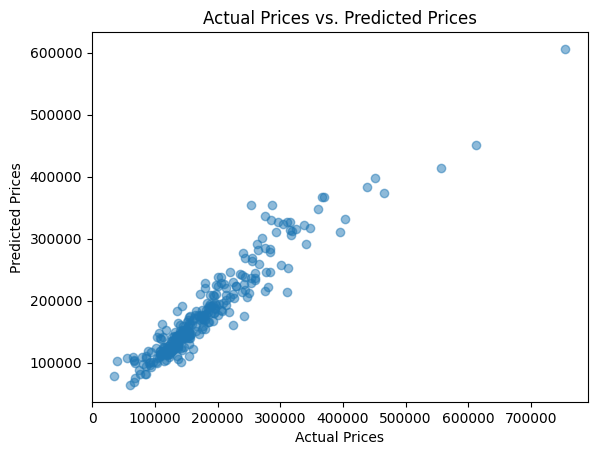

In [0]:
#Model 1 kde trenujeme pouze numerické hodnoty 

import numpy as np  # Import the NumPy library

# Split the data into features (X) and the target (y)
X = numerical_categories.drop(columns=['SalePrice'])
y = numerical_categories['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}") #Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#příprava pro model 3 (num. hodnoty, doplnění NaN s mean, připnutí sloupečku SalePrice)

In [0]:
#vzor: train_new = pd.concat([train, numerical_categories], axis = 1 )
#spojujeme do train zbývající object sloupečky a doplňujeme sloupečky s numerickými hodnotami, ale již doplněnými o průměrné hodnoty, tam kde hodnoty v původním DF chyběly

#df_obj_new = pd.concat([train_new, df_obj, "SalePrice"], axis = 1 )

In [0]:
train.head()

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [0]:
train.shape

(1460, 46)

In [0]:
# Assuming both datasets have a common key column (e.g., index 0) for merging
df_obj_new = df_obj.merge(df_num.iloc[:, [-1]], left_index=True, right_index=True, how='inner')
# 'merged_df' now contains all columns from 'df_obj' and the last column from 'train'


In [0]:
df_obj_new.info() #tento DF obsahuje původní objects převedené na integery + SalePrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   Street         1460 non-null   int64
 2   Alley          1460 non-null   int64
 3   LotShape       1460 non-null   int64
 4   LandContour    1460 non-null   int64
 5   Utilities      1460 non-null   int64
 6   LotConfig      1460 non-null   int64
 7   LandSlope      1460 non-null   int64
 8   Neighborhood   1460 non-null   int64
 9   Condition1     1460 non-null   int64
 10  Condition2     1460 non-null   int64
 11  BldgType       1460 non-null   int64
 12  HouseStyle     1460 non-null   int64
 13  RoofStyle      1460 non-null   int64
 14  RoofMatl       1460 non-null   int64
 15  Exterior1st    1460 non-null   int64
 16  Exterior2nd    1460 non-null   int64
 17  MasVnrType     1460 non-null   int64
 18  ExterQual      1460 non-null   int64
 19  ExterC

In [0]:
df_obj_new.head() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4,208500
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4,181500
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,223500
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0,140000
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,250000


In [0]:
df_obj_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   Street         1460 non-null   int64
 2   Alley          1460 non-null   int64
 3   LotShape       1460 non-null   int64
 4   LandContour    1460 non-null   int64
 5   Utilities      1460 non-null   int64
 6   LotConfig      1460 non-null   int64
 7   LandSlope      1460 non-null   int64
 8   Neighborhood   1460 non-null   int64
 9   Condition1     1460 non-null   int64
 10  Condition2     1460 non-null   int64
 11  BldgType       1460 non-null   int64
 12  HouseStyle     1460 non-null   int64
 13  RoofStyle      1460 non-null   int64
 14  RoofMatl       1460 non-null   int64
 15  Exterior1st    1460 non-null   int64
 16  Exterior2nd    1460 non-null   int64
 17  MasVnrType     1460 non-null   int64
 18  ExterQual      1460 non-null   int64
 19  ExterC

#MODEL 3 Random Forest (pouze stringy konvertované do num. hodnot)

Mean Squared Error (MSE): 2087765579.4503145
R-squared (R2): 0.727812674056278


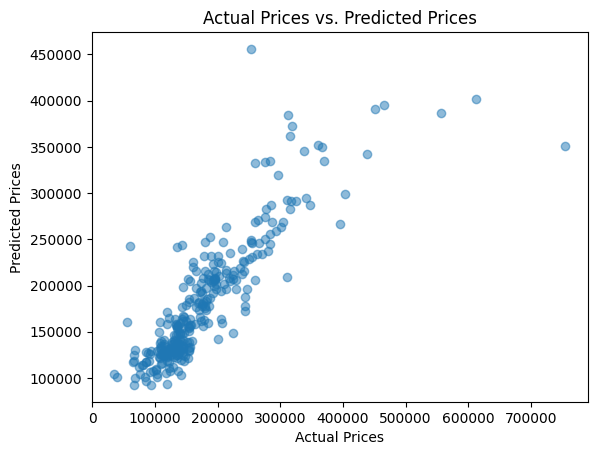

In [0]:
#Model2 kde trenujeme pouze stringy convertované do numerických hodnot

# Split the data into features (X) and the target (y)
X = df_obj_new.drop(columns=['SalePrice'])
y = df_obj_new['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}") #Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}") #Higher values of R2 indicate better model performance.

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [0]:

df_obj_new_ID = pd.DataFrame(df_obj_new)

# Add a new column with automatic IDs
df_obj_new_ID['ID'] = range(1, len(df_obj_new_ID) + 1)

# Display the updated DataFrame
print(df_obj_new_ID)

      MSZoning  Street  Alley  ...  SaleCondition  SalePrice    ID
0            3       1      2  ...              4     208500     1
1            3       1      2  ...              4     181500     2
2            3       1      2  ...              4     223500     3
3            3       1      2  ...              0     140000     4
4            3       1      2  ...              4     250000     5
...        ...     ...    ...  ...            ...        ...   ...
1455         3       1      2  ...              4     175000  1456
1456         3       1      2  ...              4     210000  1457
1457         3       1      2  ...              4     266500  1458
1458         3       1      2  ...              4     142125  1459
1459         3       1      2  ...              4     147500  1460

[1460 rows x 45 columns]


In [0]:
numerical_categories_ID = pd.DataFrame(numerical_categories)

# Add a new column with automatic IDs
numerical_categories_ID['ID'] = range(1, len(numerical_categories_ID) + 1)

# Display the updated DataFrame
print(numerical_categories_ID)

      MSSubClass  LotArea  OverallQual  ...  YrSold  SalePrice    ID
0             60     8450            7  ...    2008     208500     1
1             20     9600            6  ...    2007     181500     2
2             60    11250            7  ...    2008     223500     3
3             70     9550            7  ...    2006     140000     4
4             60    14260            8  ...    2008     250000     5
...          ...      ...          ...  ...     ...        ...   ...
1455          60     7917            6  ...    2007     175000  1456
1456          20    13175            6  ...    2010     210000  1457
1457          70     9042            7  ...    2010     266500  1458
1458          20     9717            5  ...    2010     142125  1459
1459          20     9937            5  ...    2008     147500  1460

[1460 rows x 35 columns]


In [0]:
# Assuming there's a common column 'common_column' for merging
train_new_complete = pd.merge(df_obj_new_ID, numerical_categories_ID, on='ID', how='inner')
print(train_new_complete)

      MSZoning  Street  Alley  LotShape  ...  MiscVal  MoSold  YrSold  SalePrice_y
0            3       1      2         3  ...        0       2    2008       208500
1            3       1      2         3  ...        0       5    2007       181500
2            3       1      2         0  ...        0       9    2008       223500
3            3       1      2         0  ...        0       2    2006       140000
4            3       1      2         0  ...        0      12    2008       250000
...        ...     ...    ...       ...  ...      ...     ...     ...          ...
1455         3       1      2         3  ...        0       8    2007       175000
1456         3       1      2         3  ...        0       2    2010       210000
1457         3       1      2         3  ...     2500       5    2010       266500
1458         3       1      2         3  ...        0       4    2010       142125
1459         3       1      2         3  ...        0       6    2008       147500

[14

In [0]:
train_new_complete.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice_x,ID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_y
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4,208500,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4,181500,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,223500,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0,140000,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,250000,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
train_final = train_new_complete.drop("SalePrice_y", axis=1)

In [0]:
train_final.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice_x,ID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4,208500,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4,181500,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,223500,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0,140000,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,250000,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


#MODEL 4 Random Forest (train_final) kompletní upravený původní dataset

Mean Squared Error (MSE): 795038255.5241084
R-squared (R2): 0.8963488339284509


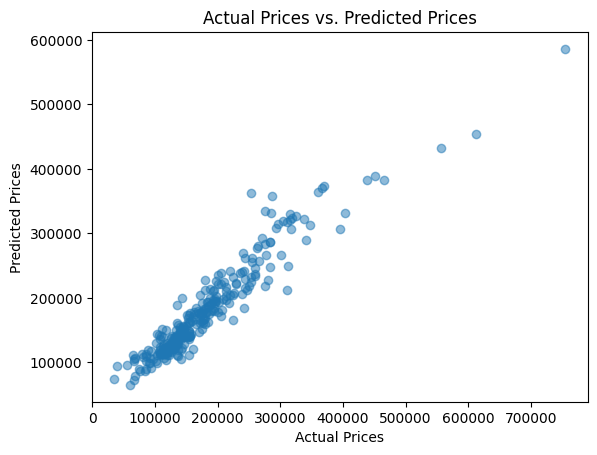

In [0]:
#MODEL 4

# Model kde trenujeme veškerá data z původního datasetu, ale překonvertovaná z objektů do num. kategorií (+doplněné NaN průměrem) a na číselných sloupcích také doplněny chybějící hodnoty o průměr 

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}") #Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

#pro porování co vyšlo při pouze numerických sloupcích (MODEL2)
#Mean Squared Error (MSE): 811 662 374.1047322 (přesnost modelu)
#R-squared (R2): 0.8941815051693367 (variabilita modelu)

#pro porování co vyšlo při pouze objectových sloupcích (MODEL3)
#Mean Squared Error (MSE): 2 087 765 579.4503145
#R-squared (R2): 0.727812674056278


Mean Squared Error (MSE): 792265615.1746074
R-squared (R2): 0.8967103101257609


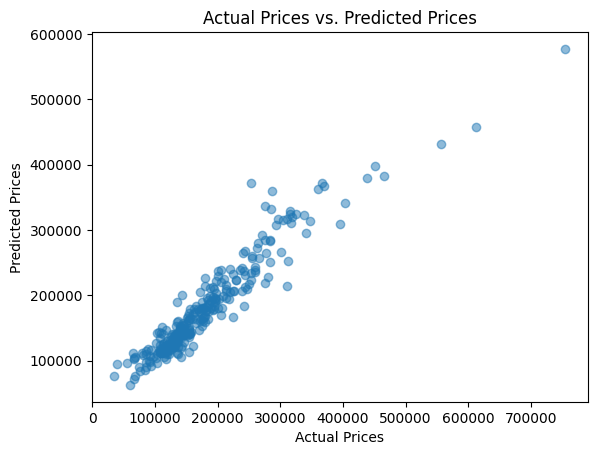

In [0]:
#MODEL 4b -> zvýšené estimators na 200 (dle hyperparameter tunning modelu, best params) = nepomůže k lepšímu výsledku, vlivem preprocessingu nemusí už platit jako best parametry

# Model kde trenujeme veškerá data z původního datasetu, ale překonvertovaná z objektů do num. kategorií (+doplněné NaN průměrem) a na číselných sloupcích také doplněny chybějící hodnoty o průměr 

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}") #Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

#pro porování co vyšlo při pouze numerických sloupcích (MODEL2)
#Mean Squared Error (MSE): 811 662 374.1047322 (přesnost modelu)
#R-squared (R2): 0.8941815051693367 (variabilita modelu)

#pro porování co vyšlo při pouze objectových sloupcích (MODEL3)
#Mean Squared Error (MSE): 2 087 765 579.4503145
#R-squared (R2): 0.727812674056278


#MODEL 5 Random Forest (použití nového sloupce sum)

In [0]:
# Select specific columns by their names
columns_to_sum = ['1stFlrSF', '2ndFlrSF', 'PoolArea', 'TotalBsmtSF', 'GarageArea']

# Sum the values in row 1 for the selected columns
row1_sum = train_final.loc[1, columns_to_sum].sum()
print("Sum of row 1 for selected columns:", row1_sum)

Sum of row 1 for selected columns: 2984


In [0]:
df = pd.DataFrame(train_final)

# Select specific columns to sum
columns_to_sum = ['1stFlrSF', '2ndFlrSF', 'PoolArea', 'TotalBsmtSF', 'GarageArea']

# Sum the values of the selected columns for each row and create a new column 'Sum_Columns'
df['Sum_Columns'] = df[columns_to_sum].sum(axis=1)

# Print the updated DataFrame
print(df)

      MSZoning  Street  Alley  LotShape  ...  MiscVal  MoSold  YrSold  Sum_Columns
0            3       1      2         3  ...        0       2    2008         3114
1            3       1      2         3  ...        0       5    2007         2984
2            3       1      2         0  ...        0       9    2008         3314
3            3       1      2         0  ...        0       2    2006         3115
4            3       1      2         0  ...        0      12    2008         4179
...        ...     ...    ...       ...  ...      ...     ...     ...          ...
1455         3       1      2         3  ...        0       8    2007         3060
1456         3       1      2         3  ...        0       2    2010         4115
1457         3       1      2         3  ...     2500       5    2010         3744
1458         3       1      2         3  ...        0       4    2010         2396
1459         3       1      2         3  ...        0       6    2008         2788

[14

In [0]:
df.head() #nový dataset s Sum_Columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice_x,ID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Sum_Columns
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4,208500,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,3114
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4,181500,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,2984
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,223500,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,3314
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0,140000,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,3115
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4,250000,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,4179


Mean Squared Error (MSE): 906972888.7954274
R-squared (R2): 0.8817556301652998


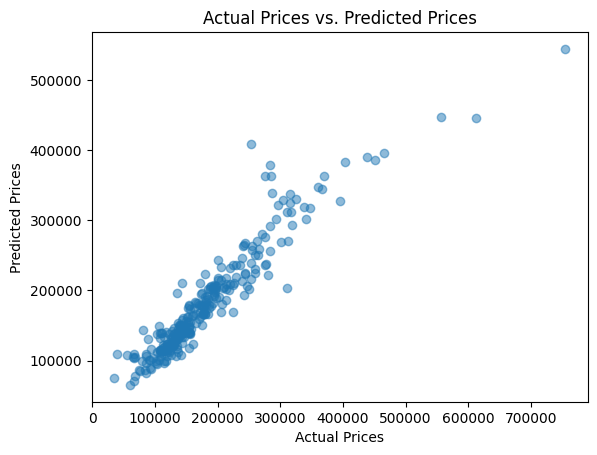

In [0]:
#MODEL 5

# Split the data into features (X) and the target (y)
X = df.drop(columns=['SalePrice_x'])
y = df['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}") #Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

#Mean Squared Error (MSE): 795 038 255.5241084 pro model 4
#R-squared (R2): 0.8963488339284509 pro model 4

In [0]:
numerical_categories_ID.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ID
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,2
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,4
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,5


#MODEL 6 Gradient Boosting Regressor

Mean Squared Error (MSE): 809789312.1402837
R-squared (R2): 0.8944257010371335


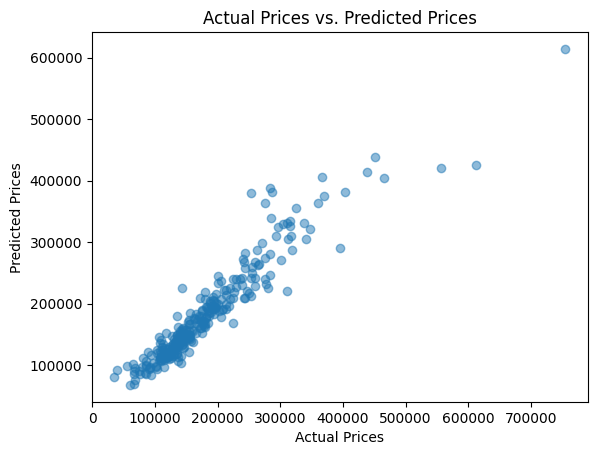

In [0]:
#MODEL 6....MODEL 4 dataset with gradient boosting regresor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor  # Import Gradient Boosting Regressor

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Use GradientBoostingRegressor
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#MODEL 7 Neural Network (NN) version for regression using a library like TensorFlow or Keras

In [0]:
pip install tensorflow

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


Epoch 1/50
37/37 [==============================] - 1s 8ms/step - loss: 37206970368.0000 - val_loss: 35922788352.0000
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 31143174144.0000 - val_loss: 27227543552.0000
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 19202183168.0000 - val_loss: 13148805120.0000
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 8414766080.0000 - val_loss: 5593850368.0000
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 5910381056.0000 - val_loss: 4808889344.0000
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 5153150464.0000 - val_loss: 4468490240.0000
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 4570546176.0000 - val_loss: 4190032896.0000
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 4172807680.0000 - val_loss: 4030008320.0000
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - 

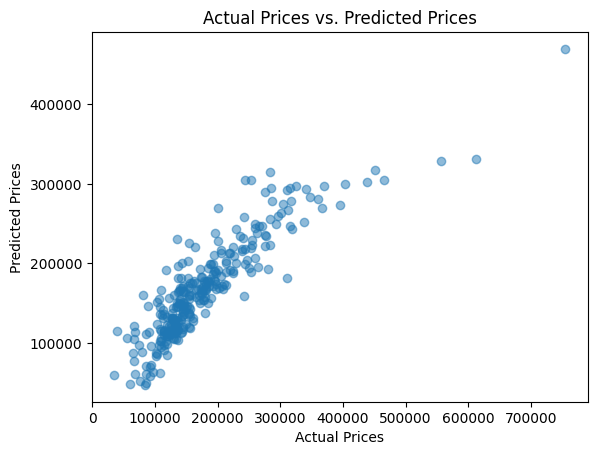

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 units and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    layers.Dense(1)  # Output layer with 1 unit (regression task)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


# MODEL 8 XGBoost

In [0]:
pip install xgboost

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


Mean Squared Error (MSE): 955428026.9197676
R-squared (R2): 0.8754384101650686


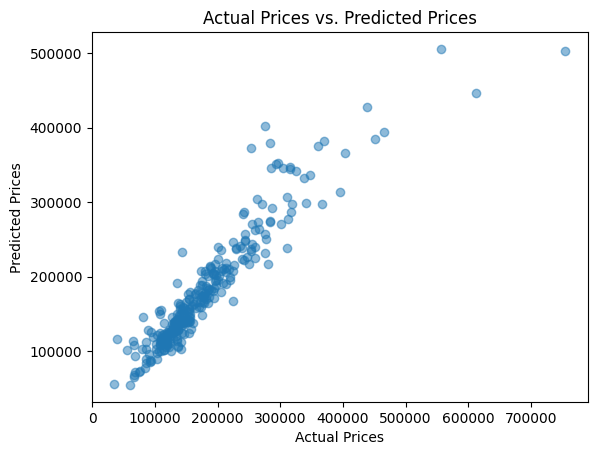

In [0]:

import xgboost as xgb

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#MODEL 9 Lineární regrese

Mean Squared Error (MSE): 1211512877.1389685
R-squared (R2): 0.8420519747903582


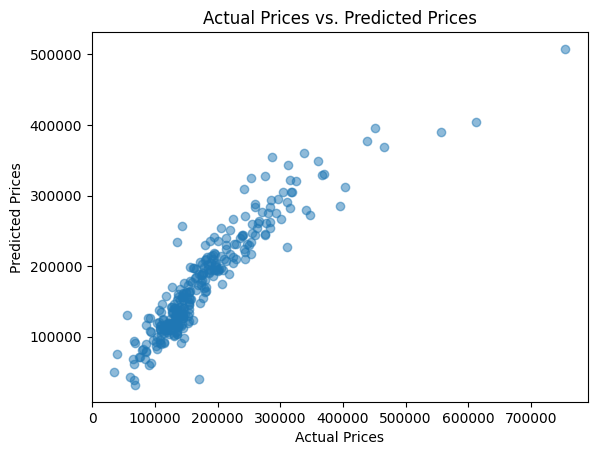

In [0]:

from sklearn.linear_model import LinearRegression


# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#MODEL 10 Lineární regrese + Optuna

In [0]:
pip install optuna

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


[I 2023-10-17 16:47:11,011] A new study created in memory with name: no-name-d3151cd5-4ae8-4fee-b5a5-075451ef7298
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

[I 2023-10-17 16:47:11,049] Trial 0 finished with value: 1211512877.1389685 and parameters: {'fit_intercept': True, 'normalize': False}. Best is trial 0 with value: 1211512877.1389685.
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

Mean Squared Error (MSE): 1211266461.4101956
R-squared (R2): 0.8420841006376972


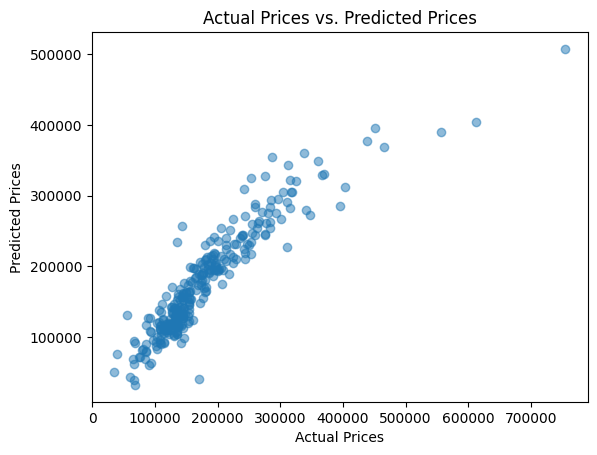

In [0]:
#Optuna is a powerful tool for hyperparameter optimization, and it can help you find better hyperparameters for machine learning models, including Random Forest Regressors. However, the effectiveness of Optuna depends on the dataset and the problem you are working on. 

import optuna

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'normalize': trial.suggest_categorical('normalize', [True, False])
    }

    # Create a Linear Regression model with optimized hyperparameters
    model = LinearRegression(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create the final Linear Regression model with the best hyperparameters
final_model = LinearRegression(**best_params)
final_model.fit(X_train, y_train)

# Model Prediction
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#MODEL 10b Random forest regressor + Optuna

[I 2023-10-17 16:47:16,546] A new study created in memory with name: no-name-76496447-50a1-4509-b313-fe29d6512971
[I 2023-10-17 16:47:16,675] Trial 0 finished with value: 7677655713.906343 and parameters: {'n_estimators': 90, 'max_depth': 18, 'min_samples_split': 0.9139037663390694, 'min_samples_leaf': 0.2579484611189983}. Best is trial 0 with value: 7677655713.906343.
[I 2023-10-17 16:47:16,905] Trial 1 finished with value: 7676879120.074683 and parameters: {'n_estimators': 153, 'max_depth': 28, 'min_samples_split': 0.37410687810706933, 'min_samples_leaf': 0.3503398352323185}. Best is trial 1 with value: 7676879120.074683.
[I 2023-10-17 16:47:16,991] Trial 2 finished with value: 3774218124.330012 and parameters: {'n_estimators': 31, 'max_depth': 23, 'min_samples_split': 0.56645535376276, 'min_samples_leaf': 0.11183781810109622}. Best is trial 2 with value: 3774218124.330012.
[I 2023-10-17 16:47:17,017] Trial 3 finished with value: 7678228757.137558 and parameters: {'n_estimators': 14,

Mean Squared Error (MSE): 2759318427.378524
R-squared (R2): 0.6402606156706827


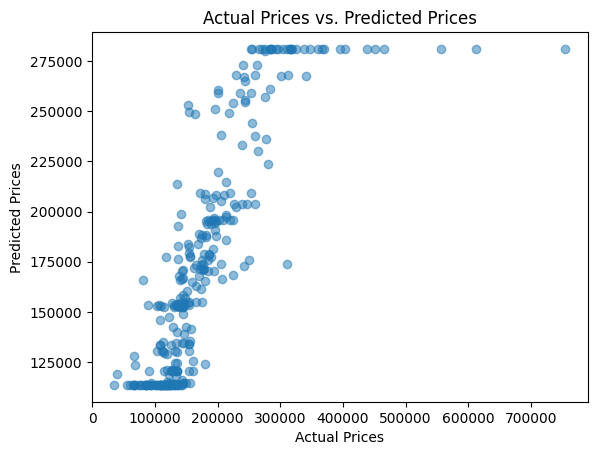

In [0]:
#10b Random forest regressor with Optuna

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    }

    # Create a Random Forest Regressor model with optimized hyperparameters
    model = RandomForestRegressor(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create the final Random Forest Regressor model with the best hyperparameters
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)

# Model Prediction
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


#MODEL 10c XGBoost with Optuna

[I 2023-10-17 16:47:55,089] A new study created in memory with name: no-name-5f211cb6-c88a-4033-a4e5-2b6d2f231708
[I 2023-10-17 16:47:55,599] Trial 0 finished with value: 750383913.3268274 and parameters: {'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.09199460192870988, 'subsample': 0.5090908282372042, 'colsample_bytree': 0.6757354031789793}. Best is trial 0 with value: 750383913.3268274.
[I 2023-10-17 16:47:57,840] Trial 1 finished with value: 686882659.3794134 and parameters: {'n_estimators': 147, 'max_depth': 32, 'learning_rate': 0.0566357875298104, 'subsample': 0.7197015569671282, 'colsample_bytree': 0.9736172102019364}. Best is trial 1 with value: 686882659.3794134.
[I 2023-10-17 16:47:58,133] Trial 2 finished with value: 1237998513.397727 and parameters: {'n_estimators': 46, 'max_depth': 12, 'learning_rate': 0.05394901129531675, 'subsample': 0.5523980177426466, 'colsample_bytree': 0.6299214019903586}. Best is trial 1 with value: 686882659.3794134.
[I 2023-10-17 16:47:58

Mean Squared Error (MSE): 608922102.6034648
R-squared (R2): 0.920613271697245


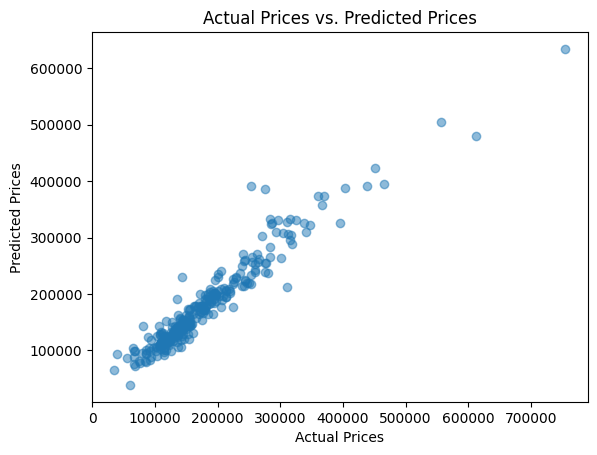

In [0]:


# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    # Create an XGBoost Regressor model with optimized hyperparameters
    model = xgb.XGBRegressor(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create the final XGBoost Regressor model with the best hyperparameters
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Model Prediction
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


In [0]:
#Optuna is a powerful tool for hyperparameter optimization, and it can help you find better hyperparameters for machine learning models, including Random Forest Regressors. However, the effectiveness of Optuna depends on the dataset and the problem you are working on. If you are finding that the results are not as expected, there are several things you can consider:

#Data Quality: Ensure that your dataset is clean and well-preprocessed. If the data quality is poor, optimizing hyperparameters might not lead to significant improvements.

#Feature Engineering: Explore feature engineering techniques to create meaningful features that can improve model performance.

#Model Selection: Optuna can be used with various regression models. You might want to try different models to see if another one performs better for your specific dataset.

#Data Size: For smaller datasets, it can be challenging to achieve high performance. Consider collecting more data if possible.

#Objective Function: The choice of the objective function can also impact the results. You can try optimizing for different metrics such as Mean Absolute Error (MAE) or other custom metrics relevant to your problem.

#Ensemble Methods: Consider using ensemble methods like stacking or blending to combine the predictions of multiple models.

#Regularization: Implement regularization techniques to prevent overfitting.

#Cross-Validation: Ensure that you are using cross-validation during the hyperparameter optimization process to get a more robust estimate of model performance.

#Domain Knowledge: Leverage domain knowledge to make informed decisions about hyperparameters and feature engineering.

#Optuna can be a valuable tool, but it's not a guaranteed solution for every problem. It's essential to combine it with a good understanding of your data and the problem you are trying to solve. If you've tried various options and are still not getting the desired results, it's worth exploring the points mentioned above and potentially seeking domain-specific advice.

#Výsledky MSE a R2

In [0]:
# MODEL 1: Radnom Forest with hyperparametrs
#Mean Squared Error (MSE): 811 662 374.1047322
#R-squared (R2): 0.8817556301652998

# MODEL2: pro porování co vyšlo při pouze numerických sloupcích
#Mean Squared Error (MSE): 811 662 374.1047322 (přesnost modelu)
#R-squared (R2): 0.8941815051693367 (variabilita modelu)

# MODEL3: pro porování co vyšlo při pouze objectových sloupcích
#Mean Squared Error (MSE): 2 087 765 579.4503145
#R-squared (R2): 0.727812674056278

# Model 4: kombinace numerického datasetu a objectového----> druhý nejlepsi model
#Mean Squared Error (MSE): 795 038 255.5241084
#R-squared (R2): 0.8963488339284509

# MODEL 5: Random forest se sloupeckem navíc (soucet plochy)
#Mean Squared Error (MSE): 906 972 888.7954274
#R-squared (R2): 0.8817556301652998

# MODEL 6: Gradient Boosting Regressor
#Mean Squared Error (MSE): 809 789 312.1402837
#R-squared (R2): 0.8944257010371335

# MODEL 7: MODEL 7 Neural Network (NN) version for regression using a library like TensorFlow or Keras
#Mean Squared Error (MSE): 1 992 063 734.1390848
#R-squared (R2): 0.7402895678318722

# MODEL 8: XGBoost
#Mean Squared Error (MSE): 955 428 026.9197676
#R-squared (R2): 0.8754384101650686

# MODEL 9: Lineární regrese
#Mean Squared Error (MSE): 1 211 512 877.1389685
#R-squared (R2): 0.8420519747903582

# MODEL 10c XGBoost with Optuna -----> NEJLEPŠÍ VÝSLEDEK
#Mean Squared Error (MSE): 608 922 102.6034648
#R-squared (R2): 0.920613271697245



#MLflow 4

In [0]:
pip install optuna mlflow xgboost

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
#MODEL 4 with ML flow

import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Check if there's an active run; if yes, end it
if mlflow.active_run():
    mlflow.end_run()
    
# Start an MLflow run
with mlflow.start_run():
    # Get the RUN_ID
    run_id = mlflow.active_run().info.run_id

    # Split the data into features (X) and the target (y)
    X = train_final.drop(columns=['SalePrice_x'])
    y = train_final['SalePrice_x']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building (Random Forest Regressor as an example)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred = model.predict(X_test)

    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Log model parameters and metrics to MLflow
    mlflow.log_params({"n_estimators": 100, "random_state": 42})
    mlflow.log_metrics({"MSE": mse, "R2": r2})
    model_name = "Model4"
    model_version = mlflow.register_model("runs:/<RUN_ID>/model", model_name)
    
    # Visualize actual vs. predicted prices
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual Prices vs. Predicted Prices")
    
    # Save the plot as an artifact
    plt.savefig("scatter_plot.png")
    mlflow.log_artifact("scatter_plot.png")


Registered model 'Model4' already exists. Creating a new version of this model...


---------------------------------------------------------------------------
RestException                             Traceback (most recent call last)
File <command-3490614360311162>, line 42
     40 mlflow.log_metrics({"MSE": mse, "R2": r2})
     41 model_name = "Model4"
---> 42 model_version = mlflow.register_model("runs:/<RUN_ID>/model", model_name)
     44 # Visualize actual vs. predicted prices
     45 plt.scatter(y_test, y_pred, alpha=0.5)

File /databricks/python/lib/python3.10/site-packages/mlflow/tracking/_model_registry/fluent.py:73, in register_model(model_uri, name, await_registration_for, tags)
     17 def register_model(
     18     model_uri,
     19     name,
   (...)
     22     tags: Optional[Dict[str, Any]] = None,
     23 ) -> ModelVersion:
     24     """
     25     Create a new model version in model registry for the model files specified by ``model_uri``.
     26     Note that this method assumes the model registry backend URI is the same as that of the
   (...

#MLflow 10c

In [0]:
import pandas as pd
import xgboost as xgb
import optuna
import mlflow
import mlflow.xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    with mlflow.start_run():
        # Log the hyperparameters to MLflow
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Create an XGBoost Regressor model with optimized hyperparameters
        model = xgb.XGBRegressor(**params)

        # Train the model
        model.fit(X_train, y_train)

        # Model Prediction
        y_pred = model.predict(X_test)

        # Calculate the Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)

        # Log the MSE to MLflow
        mlflow.log_metric("MSE", mse)

        return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create the final XGBoost Regressor model with the best hyperparameters
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Model Prediction
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Log the best hyperparameters to MLflow
with mlflow.start_run():
    for key, value in best_params.items():
        mlflow.log_param(key, value)

# Log the final model to MLflow
mlflow.xgboost.log_model(final_model, "xgboost_model")

# Visualize the optimization process
optuna.visualization.plot_optimization_history(study)
plt.show()

# Visualize the hyperparameter importances
optuna.visualization.plot_param_importances(study)
plt.show()



In [0]:
#MLflow 10c II

import xgboost as xgb
import optuna
import mlflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target (y)
X = train_final.drop(columns=['SalePrice_x'])
y = train_final['SalePrice_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an MLflow experiment name as an absolute path
mlflow.set_experiment("/Users/jirinka.kotkova@gmail.com/SDA Final Project/Project/experiment-2")

def objective(trial):
    # Create a unique run name for each Optuna trial
    run_name = f"run_{trial.number}"

    # Start an MLflow run
    with mlflow.start_run(run_name=run_name):
        # Define hyperparameters to optimize
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 200),
            'max_depth': trial.suggest_int('max_depth', 2, 32),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }

        # Log the hyperparameters to MLflow
        mlflow.log_params(params)

        # Create an XGBoost Regressor model with optimized hyperparameters
        model = xgb.XGBRegressor(**params)

        # Train the model
        model.fit(X_train, y_train)

        # Model Prediction
        y_pred = model.predict(X_test)

        # Calculate the Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)

        # Log the MSE to MLflow
        mlflow.log_metric("MSE", mse)

        return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create the final XGBoost Regressor model with the best hyperparameters
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Model Prediction
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")  # Lower values of MSE indicate better model performance.
print(f"R-squared (R2): {r2}")

# Log the best hyperparameters to MLflow
mlflow.log_params(best_params)

# Log the final model to MLflow
mlflow.xgboost.log_model(final_model, "xgboost_model")

# Visualize the optimization process
optuna.visualization.plot_optimization_history(study)
plt.show()

# Visualize the hyperparameter importances
optuna.visualization.plot_param_importances(study)
plt.show()


In [0]:
# End the MLflow run
mlflow.end_run()

In [0]:
'''
Suggestions:

Categorical encoding: OHE
Imputer: mean, mode

TO DO:
HyperOPT

před nalitím na GIT nutno pročistit kód o zbytečný balast!
'''